In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('loan.csv')

C:\kosta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(2260668, 145)

In [5]:
df=df.dropna(axis=1,how='all')
#remove totally empty columns - id, member_id, loan_amnt'

In [33]:
for col in sorted(df.columns):
    print(col)
    #full printout of columns for reference

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
debt_settlement_flag
debt_settlement_flag_date
deferral_term
delinq_2yrs
delinq_amnt
desc
disbursement_method
dti
dti_joint
earliest_cr_line
emp_length
emp_title
funded_amnt
funded_amnt_inv
grade
hardship_amount
hardship_dpd
hardship_end_date
hardship_flag
hardship_last_payment_amount
hardship_length
hardship_loan_status
hardship_payoff_balance_amount
hardship_reason
hardship_start_date
hardship_status
hardship_type
home_ownership
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
m

In [23]:
lcdloanstats=pd.read_excel('LCDataDictionary.xlsx','LoanStats')
#column descriptions from reference document

In [24]:
lcdloanstats

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


In [25]:
lcdloanstats['LoanStatNew']=lcdloanstats['LoanStatNew'].str.strip()

In [26]:
lcdloanstats=lcdloanstats.loc[lcdloanstats['LoanStatNew'].isin(df.columns)]

In [27]:
lcdloanstats
#extra items removed from column description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
146,settlement_status,The status of the borrower’s settlement plan. ...
147,settlement_date,The date that the borrower agrees to the settl...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...


In [16]:
(df.loc[df.funded_amnt!=df.funded_amnt_inv]['funded_amnt'].astype(int)-df.loc[df.funded_amnt!=df.funded_amnt_inv]['funded_amnt_inv'].astype(int)).describe()
#no unfunded loans and inv_ is bullshit redundant drop columns 'funded_amnt_inv', 'funded_amt'

count    151112.00000
mean        272.69921
std        1263.13647
min           1.00000
25%          25.00000
50%          50.00000
75%         175.00000
max       32475.00000
dtype: float64

In [18]:
(df['funded_amnt']-df['funded_amnt_inv']).describe()

count    2.260668e+06
mean     1.822643e+01
std      3.335880e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.247500e+04
dtype: float64

In [20]:
df.loc[df.funded_amnt!=df.funded_amnt_inv]['issue_d'].value_counts()

Jul-2015    5731
Mar-2016    5061
Aug-2015    4266
Dec-2017    3901
Oct-2015    3886
            ... 
Aug-2007      73
Jul-2007      62
Sep-2008      57
Sep-2007      53
Jun-2007      24
Name: issue_d, Length: 139, dtype: int64

In [29]:
lcdloanstats.loc[lcdloanstats['LoanStatNew'].str.contains('funded')]

,LoanStatNew,Description
23,funded_amnt,The total amount committed to that loan at tha...
24,funded_amnt_inv,The total amount committed by investors for th...


In [120]:
df.policy_code.describe()

count    2260668.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64

In [ ]:
for i in ['title','desc','policy_code','funded_amnt_inv','funded_amnt']:
    print(i,lcdloanstats.loc[lcdloanstats['LoanStatNew']==i]['Description'])
    print('\n\n')

'policy' is ambiguous in its meaning and will be dropped
'title' and 'desc' are redundant after the better curated and 'purpose'
'funded_amnt' and 'funded_amnt_inv' can be dropped and use only 'loan_amnt'

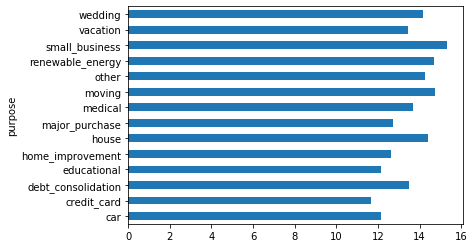

In [215]:
df.groupby('purpose')['int_rate'].mean().plot.barh()

In [205]:
#keep 'purpose' - drop 'title', 'desc', 'policy'
df=df.drop(columns=['title','desc','policy_code','funded_amnt_inv','funded_amnt'])

In [316]:
df.dtypes.loc[df.dtypes=='object']

term                         object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
purpose                      object
zip_code                     object
addr_state                   object
earliest_cr_line             object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
hardship_flag                object
hardship_type                object
hardship_reason              object
hardship_status              object
hardship_start_date          object
hardship_end_date            object
payment_plan_start_date      object
hardship_loan_status         object
disbursement_method          object
debt_settlement_flag        

Set date columns to pandas datetime

In [329]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d']=pd.to_datetime(df['next_pymnt_d'])

In [85]:
brows_cols=[]
for col in df.columns:
    if col not in desc_columns.values:
        brows_cols.append(col)
brows_cols

['verification_status_joint']

In [77]:
df[brows_cols].isna().sum()

verification_status_joint    2144938
dtype: int64

In [115]:
df['verification_status_joint'].value_counts()
#only relevant where joint application

Not Verified       57403
Source Verified    34827
Verified           23500
Name: verification_status_joint, dtype: int64

In [14]:
#columns with no NaNs
df.dropna(axis='columns').columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'revol_bal', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [89]:
df.dropna(axis='columns').describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2260668.0
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,1.665846e+04,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.0
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,2.294831e+04,7.547612e+03,7.546657e+03,9.889599e+03,9.884835e+03,8.304886e+03,2.663086e+03,1.150210e+01,7.258317e+02,1.271114e+02,5.971757e+03,0.0
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.500000e-09,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,5.950000e+03,0.000000e+00,0.000000e+00,4.272580e+03,4.257730e+03,2.846180e+03,6.936100e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.086400e+02,1.0
50%,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,1.132400e+04,0.000000e+00,0.000000e+00,9.060870e+03,9.043080e+03,6.823385e+03,1.485280e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.884700e+02,1.0
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,2.024600e+04,6.712632e+03,6.710320e+03,1.670797e+04,1.668257e+04,1.339750e+04,3.052220e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.534965e+03,1.0
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,2.904836e+06,4.000000e+04,4.000000e+04,6.329688e+04,6.329688e+04,4.000000e+04,2.819250e+04,1.427250e+03,3.985955e+04,7.174719e+03,4.219205e+04,1.0


In [ ]:
#drop policy code - always 1

In [103]:
df.loc[df.funded_amnt_inv==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [159]:
df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.478722
Current                                                0.385949
Charged Off                                            0.119594
Late (31-120 days)                                     0.009213
In Grace Period                                        0.003674
Late (16-30 days)                                      0.001553
Does not meet the credit policy. Status:Fully Paid     0.000929
Does not meet the credit policy. Status:Charged Off    0.000356
Default                                                0.000011
Name: loan_status, dtype: float64

In [170]:
df.application_type.value_counts(normalize=True)
#drop joint apps for simplicity - cut columns too

Individual    0.946604
Joint App     0.053396
Name: application_type, dtype: float64

Consider only loans granted to indivdual applicants for simplicity. These are by far the larger portion at almost 95% of all loans.<br>
this eliminates several columns that only relate to joint applications

In [158]:
df=df.loc[df['application_type']=='Individual']
df=df.drop(columns=['application_type'])
df=df.dropna(axis=1,how='all')

In [18]:
df_hardship=df.loc[df['hardship_status'].isna()==False]

In [20]:
df_hardship['loan_status'].value_counts()

Charged Off           3817
Current               3026
Late (31-120 days)    1663
Fully Paid            1518
In Grace Period        384
Late (16-30 days)      205
Name: loan_status, dtype: int64

In [21]:
df_hardship['hardship_status'].value_counts()

COMPLETED    7541
BROKEN       2187
ACTIVE        885
Name: hardship_status, dtype: int64

In [22]:
df_hardship.loc[df['loan_status']=='Charged Off']['hardship_status'].value_counts()

COMPLETED    2003
BROKEN       1813
ACTIVE          1
Name: hardship_status, dtype: int64

In [29]:
df['purpose'].value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

In [26]:
df['desc'].isna().sum()
#almost totally empty - redundant after purpose anyway

2134601

In [107]:
df.title.value_counts()
#redundant - use purpose

Debt consolidation                          1153293
Credit card refinancing                      469691
Home improvement                             137437
Other                                        127714
Major purchase                                44840
                                             ...   
looking for relief                                1
Student/Personal Loan Debt Consolidation          1
BillPay                                           1
peice of mind                                     1
Vintage Truck Purchase                            1
Name: title, Length: 63155, dtype: int64

In [122]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
desc                                           object
purpose                                        object
title                       

In [149]:
#why idsn't this working, should flag 'policy_code'?
all_same=[]
for col in df.columns:
    if df[col].nunique==1:
        all_same.append(col)
all_same

[]

In [147]:
df.policy_code.nunique()==1

True

In [148]:
'policy_code' in df.columns

True

In [150]:
for col in df.columns:
    print(col, df[col].nunique())

loan_amnt 1572
funded_amnt 1572
funded_amnt_inv 10057
term 2
int_rate 673
installment 93296
grade 7
sub_grade 35
emp_title 512694
emp_length 11
home_ownership 6
annual_inc 89368
verification_status 3
issue_d 139
loan_status 9
pymnt_plan 2
desc 124501
purpose 14
title 63155
zip_code 956
addr_state 51
dti 10845
delinq_2yrs 37
earliest_cr_line 754
inq_last_6mths 28
mths_since_last_delinq 173
mths_since_last_record 129
open_acc 91
pub_rec 43
revol_bal 102251
revol_util 1430
total_acc 152
initial_list_status 2
out_prncp 364399
out_prncp_inv 377353
total_pymnt 1608272
total_pymnt_inv 1299089
total_rec_prncp 487427
total_rec_int 629835
total_rec_late_fee 17991
recoveries 127920
collection_recovery_fee 140449
last_pymnt_d 135
last_pymnt_amnt 692560
next_pymnt_d 105
last_credit_pull_d 140
collections_12_mths_ex_med 16
mths_since_last_major_derog 183
policy_code 1
application_type 2
annual_inc_joint 17633
dti_joint 4018
verification_status_joint 3
acc_now_delinq 9
tot_coll_amt 15574
tot_cur_bal 

In [153]:
df.hardship_length.value_counts()

3.0    10613
Name: hardship_length, dtype: int64

In [154]:
df.hardship_flag.value_counts()

N    2259783
Y        885
Name: hardship_flag, dtype: int64

In [155]:
df.hardship_type.value_counts()

INTEREST ONLY-3 MONTHS DEFERRAL    10613
Name: hardship_type, dtype: int64

In [156]:
df.loc[df['hardship_flag']=='Y']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
95385,35500,35500,35500.0,60 months,28.72,1120.80,F,F1,Certified nursing assistant,< 1 year,OWN,36000.0,Source Verified,Oct-2018,Late (31-120 days),y,NaN,other,Other,110xx,NY,11.90,0.0,Nov-2012,0.0,NaN,NaN,9.0,0.0,11405,30.9,10.0,w,15809.97,15809.97,20933.35,20933.35,19690.03,1243.32,0.00,0.0,0.0,Feb-2019,378.39,Mar-2019,Feb-2019,0.0,NaN,1,Joint App,74000.0,12.41,Source Verified,0.0,0.0,11405.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,3.0,3238.0,31.0,36900.0,0.0,0.0,0.0,3.0,1267.0,9898.0,34.0,0.0,0.0,NaN,70.0,0.0,0.0,0.0,27.0,NaN,NaN,NaN,0.0,2.0,4.0,4.0,4.0,0.0,9.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,36900.0,11405.0,15000.0,0.0,25682.0,Aug-2007,1.0,0.0,7.0,64.6,0.0,12.0,0.0,0.0,NaN,Y,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,3.0,378.39,Feb-2019,Apr-2019,Feb-2019,3.0,22.0,Late (16-30 days),1135.17,15351.85,1045.41,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
272397,7000,7000,7000.0,36 months,20.39,261.54,D,D4,hoser,1 year,MORTGAGE,72000.0,Not Verified,Jun-2018,Late (31-120 days),n,NaN,home_improvement,Home improvement,571xx,SD,15.48,0.0,Mar-2001,1.0,35.0,NaN,10.0,0.0,3602,21.6,41.0,w,349.96,349.96,7122.51,7122.51,6650.04,472.47,0.00,0.0,0.0,Jan-2019,5.95,Mar-2019,Feb-2019,0.0,40.0,1,Individual,NaN,NaN,NaN,0.0,0.0,33714.0,2.0,3.0,3.0,4.0,1.0,30112.0,90.0,2.0,4.0,2019.0,67.0,16700.0,3.0,0.0,8.0,10.0,3371.0,9957.0,26.2,0.0,0.0,180.0,207.0,8.0,1.0,5.0,8.0,40.0,0.0,40.0,3.0,3.0,4.0,4.0,14.0,13.0,7.0,23.0,4.0,10.0,0.0,0.0,0.0,6.0,94.9,0.0,0.0,0.0,50061.0,33714.0,13500.0,33361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,INTEREST ONLY-3 MONTHS DEFERRAL,EXCESSIVE_OBLIGATIONS,ACTIVE,3.0,5.95,Dec-2018,Feb-2019,Dec-2018,3.0,28.0,Late (16-30 days),17.85,424.11,165.99,Cash,N,NaN,NaN,NaN,NaN,NaN,Na

In [164]:
for col in df.columns:
    if 'hardship' in col:
        print(col,df[col].notna().sum())

hardship_flag 2260668
hardship_type 10613
hardship_reason 10613
hardship_status 10613
hardship_amount 10613
hardship_start_date 10613
hardship_end_date 10613
hardship_length 10613
hardship_dpd 10613
hardship_loan_status 10613
hardship_payoff_balance_amount 10613
hardship_last_payment_amount 10613


In [167]:
df.loc[(df['hardship_flag']=='N')&(df['hardship_type'].notna())]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
130968,40000,36 months,6.11,1218.88,A,A1,NaN,< 1 year,MORTGAGE,504000.0,Source Verified,Sep-2018,Current,n,debt_consolidation,324xx,FL,16.62,0.0,Jun-2002,0.0,NaN,NaN,11.0,0.0,0,0.0,26.0,w,37964.39,37964.39,3035.19,3035.19,2035.61,999.58,0.00,0.0,0.0,Feb-2019,1218.88,Mar-2019,Feb-2019,0.0,NaN,Joint App,624000.0,21.31,Source Verified,0.0,0.0,708046.0,1.0,8.0,0.0,5.0,14.0,193156.0,49.0,1.0,1.0,0.0,44.0,10400.0,0.0,3.0,0.0,6.0,70805.0,10400.0,0.0,0.0,0.0,193.0,195.0,6.0,6.0,5.0,6.0,NaN,14.0,NaN,0.0,0.0,0.0,2.0,2.0,16.0,2.0,5.0,0.0,11.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,918678.0,193156.0,10400.0,287828.0,154504.0,Apr-2003,1.0,4.0,8.0,98.6,5.0,3.0,0.0,0.0,NaN,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,3.0,203.67,Oct-2018,Dec-2018,Oct-2018,3.0,0.0,Issued,611.01,40149.35,1.01,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
132095,22825,36 months,19.92,847.33,D,D3,NaN,NaN,OWN,106000.0,Verified,Sep-2018,Current,n,debt_consolidation,324xx,FL,37.93,1.0,Apr-2001,1.0,4.0,NaN,28.0,0.0,6434,41.5,40.0,w,21881.12,21881.12,2806.10,2806.10,943.88,1862.22,0.00,0.0,0.0,Feb-2019,847.33,Mar-2019,Feb-2019,0.0,NaN,Individual,NaN,NaN,NaN,0.0,2695.0,116973.0,1.0,17.0,2.0,2.0,4.0,110539.0,51.0,1.0,3.0,403.0,50.0,15500.0,2.0,7.0,4.0,5.0,4178.0,3191.0,11.4,0.0,0.0,209.0,152.0,10.0,4.0,0.0,19.0,NaN,1.0,4.0,0.0,2.0,4.0,2.0,2.0,27.0,11.0,13.0,4.0,28.0,0.0,0.0,0.0,3.0,92.3,0.0,0.0,0.0,183695.0,116973.0,3600.0,168195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,3.0,378.90,Oct-2018,Dec-2018,Oct-2018,3.0,0.0,Issued,1136.70,23090.22,1.21,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
148481,8000,36 months,18.94,293.01,D,D2,Customer Service Representative,1 year,MORTGAGE,36500.0,Verified,Sep-2018,Current,n,debt_consolidation,28

Hardship flg is busted but the hardship columns are consistently filled out where needed 

In [171]:
df['hardship_amount'].notna().sum()/len(df)

0.004694630082789688

a tiny but potentially interesting part of hte dataset

In [174]:
df.initial_list_status.value_counts()

w    1535467
f     725201
Name: initial_list_status, dtype: int64

no idea what this means

In [48]:
for col,value in df.notna().sum().iteritems():
    if value==2190392:
        print(col)

tot_coll_amt
tot_cur_bal
total_rev_hi_lim
mo_sin_rcnt_tl
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_tl_bal_gt_0
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
tot_hi_cred_lim
total_il_high_credit_limit


In [53]:
df['emp_title'].str.lower().str.strip().value_counts().head(50)

teacher                     48460
manager                     45852
owner                       33591
registered nurse            23354
supervisor                  22306
driver                      22267
sales                       18984
rn                          17196
office manager              14231
project manager             13842
general manager             13317
truck driver                12797
director                    10595
president                    9826
engineer                     8978
sales manager                8532
operations manager           8183
police officer               7675
vice president               7625
technician                   7437
nurse                        7358
store manager                7265
administrative assistant     7213
accountant                   6891
mechanic                     6548
attorney                     6375
account manager              6285
assistant manager            6027
server                       5764
executive assi

In [54]:
df['emp_title']=df['emp_title'].str.lower().str.strip()

In [66]:
df.loc[df['emp_title'].str.contains('driver')==True]['emp_title'].unique()

array(['driver coordinator', 'fuel truck driver', 'driver', ...,
       'chef driver', 'aasitant-driver', 'driver and machine operator'],
      dtype=object)

In [71]:
df.loc[df['emp_title'].str.contains('nurse')==True]['emp_title'].unique()

array(['neonatal nurse practitioner', 'nurse technician',
       'registered nurse', ..., 'supervisor/woundcare nurse',
       'live nursery specialist/garden manager',
       'nurse manager - emergency department'], dtype=object)

In [160]:
df['emp_title']=df['emp_title'].replace(['registered nurse','rn','truck driver'],['nurse','nurse','driver'])
#too many drivers and nurses to actually do this for all. these are in top 50 jobs

In [161]:
df_nurse=df.loc[df['emp_title']=='nurse']
df_driver=df.loc[df['emp_title']=='driver']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

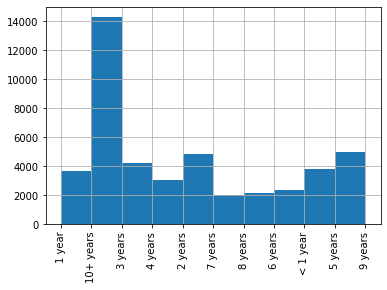

In [162]:
df_nurse['emp_length'].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

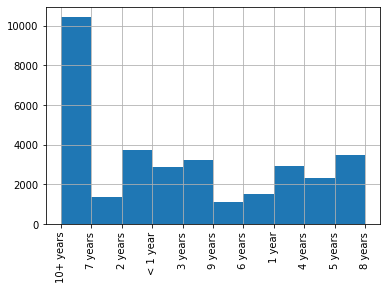

In [163]:
df_driver['emp_length'].hist()
plt.xticks(rotation=90)

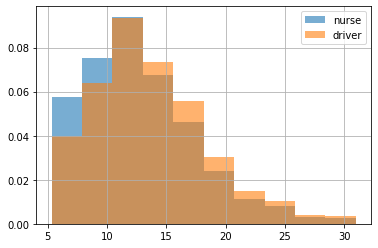

In [184]:
df_nurse['int_rate'].hist(alpha=0.6, label='nurse',normed=True)
df_driver['int_rate'].hist(alpha=0.6, label='driver',normed=True)
plt.legend()

In [165]:
print(df_nurse['annual_inc'].describe())
print(df_driver['annual_inc'].describe())

count    4.530500e+04
mean     8.382018e+04
std      7.672671e+04
min      1.090000e+04
25%      6.200000e+04
50%      7.700000e+04
75%      9.800000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64
count    3.309700e+04
mean     6.696490e+04
std      7.506120e+04
min      2.500000e+03
25%      5.000000e+04
50%      6.184400e+04
75%      7.900000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64


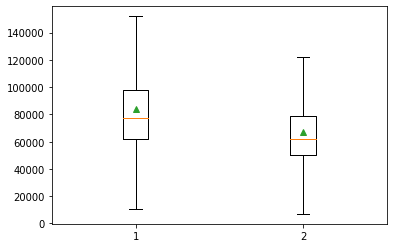

In [166]:
plt.boxplot([df_nurse['annual_inc'],df_driver['annual_inc']],showmeans=True, showfliers=False)
plt.show()

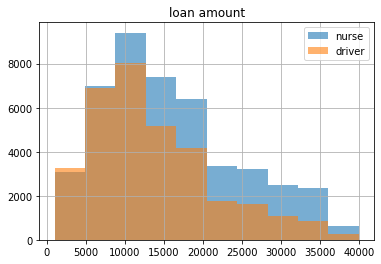

In [167]:
df_nurse['loan_amnt'].hist(alpha=0.6, label='nurse')
df_driver['loan_amnt'].hist(alpha=.6,label='driver')
plt.title('loan amount')
plt.legend()

In [168]:
df_nurse['term'].value_counts()

 36 months    32707
 60 months    12598
Name: term, dtype: int64

In [169]:
df_driver['term'].value_counts()

 36 months    24173
 60 months     8924
Name: term, dtype: int64

In [170]:
df_nurse10=df_nurse.loc[df['emp_length']=='10+ years']
df_driver10=df_driver.loc[df['emp_length']=='10+ years']

In [171]:
print(df_nurse10['annual_inc'].describe())
print(df_driver10['annual_inc'].describe())

count    1.429700e+04
mean     9.356768e+04
std      8.369992e+04
min      1.900000e+04
25%      7.000000e+04
50%      8.700000e+04
75%      1.090000e+05
max      9.000000e+06
Name: annual_inc, dtype: float64
count    1.043400e+04
mean     7.446567e+04
std      3.813308e+04
min      1.400000e+04
25%      5.500000e+04
50%      7.000000e+04
75%      8.868750e+04
max      1.644000e+06
Name: annual_inc, dtype: float64


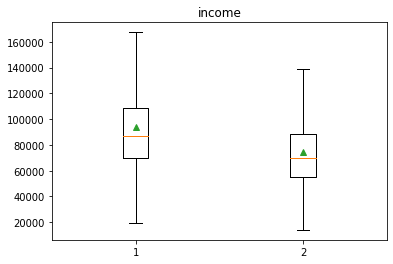

In [172]:
plt.boxplot([df_nurse10['annual_inc'],df_driver10['annual_inc']],showmeans=True, showfliers=False)
plt.title('income')
plt.show()

In [173]:
df_nurse10.loc[df['annual_inc']==9000000].dropna(axis=1).transpose().head(50)
#must be a mistake on the income - 9mil!

,970097
loan_amnt,11000
funded_amnt,11000
funded_amnt_inv,11000
term,36 months
int_rate,6.89
installment,339.1
grade,A
sub_grade,A3
emp_title,nurse
emp_length,10+ years


In [174]:
df.verification_status.value_counts()

Source Verified    851935
Not Verified       700202
Verified           587821
Name: verification_status, dtype: int64

In [175]:
df['annual_inc'].describe()

count    2.139954e+06
mean     7.900108e+04
std      1.150764e+05
min      1.896000e+03
25%      4.740000e+04
50%      6.530000e+04
75%      9.500000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [176]:
sorted(df['annual_inc'],reverse=True)

[110000000.0,
 61000000.0,
 10999200.0,
 9930475.0,
 9757200.0,
 9573072.0,
 9550000.0,
 9522972.0,
 9500000.0,
 9300086.0,
 9300000.0,
 9225000.0,
 9000000.0,
 9000000.0,
 9000000.0,
 8900060.0,
 8900000.0,
 8706582.0,
 8700000.0,
 8500021.0,
 8500000.0,
 8500000.0,
 8400000.0,
 8365188.0,
 8300000.0,
 8253000.0,
 8250000.0,
 8121180.0,
 8020871.0,
 8000000.0,
 7657196.0,
 7600033.0,
 7600000.0,
 7582566.0,
 7500000.0,
 7500000.0,
 7500000.0,
 7300000.0,
 7215069.0,
 7010600.0,
 7000055.0,
 7000000.0,
 7000000.0,
 7000000.0,
 7000000.0,
 7000000.0,
 6998721.0,
 6863991.0,
 6702150.0,
 6693021.0,
 6599100.0,
 6597760.0,
 6568417.0,
 6500000.0,
 6500000.0,
 6200000.0,
 6200000.0,
 6200000.0,
 6100000.0,
 6032121.0,
 6000000.0,
 6000000.0,
 6000000.0,
 6000000.0,
 6000000.0,
 6000000.0,
 5990095.0,
 5766366.0,
 5715456.0,
 5700000.0,
 5616890.0,
 5604824.0,
 5588951.0,
 5541120.0,
 5499500.0,
 5400000.0,
 5300000.0,
 5214756.0,
 5200000.0,
 5119032.0,
 5100000.0,
 5000010.0,
 5000000.0,


{'whiskers': [<matplotlib.lines.Line2D at 0xcd22df98>,
 'caps': [<matplotlib.lines.Line2D at 0xccf3a160>,
 'boxes': [<matplotlib.lines.Line2D at 0xcd22d978>],
 'medians': [<matplotlib.lines.Line2D at 0xccf3a550>],
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0xcd2416d8>]}

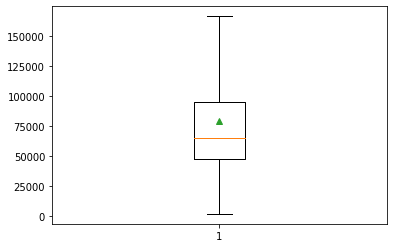

In [177]:
plt.boxplot(df['annual_inc'].dropna(),showfliers=False,showmeans=True)

In [190]:
df.loc[df['annual_inc']>5000000]['verification_status'].dropna().value_counts()

Source Verified    80
Not Verified        6
Verified            4
Name: verification_status, dtype: int64

In [191]:
df['verification_status'].value_counts(normalize=True)

Source Verified    0.398108
Not Verified       0.327204
Verified           0.274688
Name: verification_status, dtype: float64

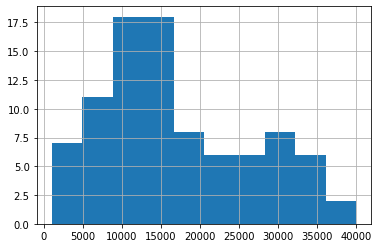

In [193]:
df.loc[df['annual_inc']>5000000]['loan_amnt'].hist()

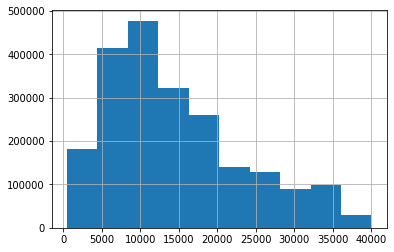

In [200]:
df['loan_amnt'].hist()

In [203]:
df[['dti','int_rate']].corr()

,dti,int_rate
dti,1.000000,0.186074
int_rate,0.186074,1.000000


In [206]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
loan_amnt,1.000000,0.099327,0.946715,0.206403,0.022236,-0.006465,-0.021244,-0.014008,0.004732,0.187646,...,NaN,0.712205,NaN,0.053640,0.710690,0.845098,0.490617,0.802037,-0.063341,0.218361
int_rate,0.099327,1.000000,0.122403,-0.048747,0.186074,0.057279,0.192301,-0.040943,-0.012375,-0.010412,...,NaN,0.620932,NaN,0.092126,0.610902,0.273757,0.216747,0.312935,-0.015682,0.111879
installment,0.946715,0.122403,1.000000,0.198431,0.028267,0.003837,0.003511,-0.022351,-0.009707,0.175685,...,NaN,0.676820,NaN,0.053857,0.672740,0.758295,0.462853,0.734756,-0.048908,0.192361
annual_inc,0.206403,-0.048747,0.198431,1.000000,-0.103446,0.025410,0.017954,-0.030430,-0.054086,0.092799,...,NaN,0.274532,NaN,0.021136,0.269508,0.408317,0.231249,0.167516,-0.004673,0.023365
dti,0.022236,0.186074,0.028267,-0.103446,1.000000,-0.014537,-0.004240,0.014800,0.070413,0.305001,...,NaN,0.057523,NaN,-0.027728,0.069172,-0.010845,0.018609,0.041728,-0.005508,0.043508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,0.845098,0.273757,0.758295,0.408317,-0.010845,-0.007382,-0.002966,-0.011531,0.026952,0.139004,...,NaN,0.884150,NaN,-0.003065,0.883029,1.000000,0.486602,0.948213,0.013882,0.298197
hardship_last_payment_amount,0.490617,0.216747,0.462853,0.231249,0.018609,-0.001907,0.038394,0.011200,-0.006696,0.077672,...,NaN,0.442509,NaN,0.066047,0.447233,0.486602,1.000000,0.513646,-0.007443,0.143542
settlement_amount,0.802037,0.312935,0.734756,0.167516,0.041728,0.005935,0.013438,-0.018599,-0.011099,0.150771,...,NaN,0.874611,NaN,0.062439,0.866817,0.948213,0.513646,1.000000,0.188243,0.254370
settlement_percentage,-0.063341,-0.015682,-0.048908,-0.004673,-0.005508,0.007348,-0.005825,-0.005908,-0.019238,-0.021588,...,NaN,0.043154,NaN,-0.013610,0.010848,0.013882,-0.007443,0.188243,1.000000,0.054471


KeyError: 'title'

Baseline machine learning

In [218]:
df['term'].value_counts()

 36 months    1539983
 60 months     599975
Name: term, dtype: int64

In [227]:
for col in df.columns:
    if df[col].nunique()<3:
        print(col,df[col].nunique(),'\n',lcdloanstats.loc[lcdloanstats['LoanStatNew']==col]['Description'].iloc[0],'\n',df[col].value_counts(),'\n\n\n\n')



term 2 
 The number of payments on the loan. Values are in months and can be either 36 or 60. 
  36 months    1539983
 60 months     599975
Name: term, dtype: int64 




pymnt_plan 2 
 Indicates if a payment plan has been put in place for the loan 
 n    2139361
y        597
Name: pymnt_plan, dtype: int64 




initial_list_status 2 
 The initial listing status of the loan. Possible values are – W, F 
 w    1432643
f     707315
Name: initial_list_status, dtype: int64 




hardship_flag 2 
 Flags whether or not the borrower is on a hardship plan 
 N    2139184
Y        774
Name: hardship_flag, dtype: int64 




hardship_type 1 
 Describes the hardship plan offering 
 INTEREST ONLY-3 MONTHS DEFERRAL    10087
Name: hardship_type, dtype: int64 




deferral_term 1 
 Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan 
 3.0    10087
Name: deferral_term, dtype: int64 




hardship_length 1 
 The number of months the bor

In [236]:
df.loc[df['disbursement_method']=='DirectPay']['purpose'].value_counts()

credit_card           36455
debt_consolidation    35863
home_improvement        287
other                   267
major_purchase           65
small_business           58
medical                  48
house                    31
vacation                 28
car                      20
moving                   19
renewable_energy          1
Name: purpose, dtype: int64

In [237]:
df.loan_status.value_counts()

Fully Paid                                             1024444
Current                                                 825914
Charged Off                                             255926
Late (31-120 days)                                       19716
In Grace Period                                           7862
Late (16-30 days)                                         3323
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     24
Name: loan_status, dtype: int64

In [240]:
(df.loc[df['loan_status']=='Charged Off']['loan_amnt']-df.loc[df['loan_status']=='Charged Off']['total_pymnt']).describe()

count    255926.000000
mean       7196.029393
std        6610.545111
min      -26947.529797
25%        2473.317500
50%        5762.655000
75%       10521.332500
max       40000.000000
dtype: float64

In [251]:
((df.loc[df['loan_status']=='Charged Off']['loan_amnt']-df.loc[df['loan_status']=='Charged Off']['total_pymnt'])/df.loc[df['loan_status']=='Charged Off']['loan_amnt']).describe()

count    255926.000000
mean          0.457517
std           0.279865
min          -1.170300
25%           0.265315
50%           0.491998
75%           0.674175
max           1.000000
dtype: float64

In [254]:
df.loc[df['loan_status']=='Charged Off'][['loan_amnt','int_rate','total_pymnt','recoveries']]

,loan_amnt,int_rate,total_pymnt,recoveries
5040,8000,6.46,0.00,0.00
25963,6000,14.47,0.00,0.00
41393,10000,8.81,0.00,0.00
55148,10000,27.27,284.25,0.00
58105,35000,16.14,0.00,0.00
...,...,...,...,...
2260633,30000,30.17,10585.43,0.00
2260638,30000,21.45,15589.61,5310.46
2260640,20700,12.62,5122.27,0.00
2260654,30000,17.09,6047.46,0.00


In [265]:
df.loc[(df['loan_status']=='Charged Off')&(df['loan_amnt']<df['total_pymnt'])][['loan_amnt','term','installment','int_rate','total_pymnt']]

,loan_amnt,term,installment,int_rate,total_pymnt
279776,20000,36 months,717.75,17.47,21732.42
326463,30000,60 months,785.17,19.42,31490.78
376843,12000,36 months,457.36,21.85,12612.78
378205,3000,36 months,92.24,6.71,3083.87
387120,32000,60 months,670.97,9.43,32268.58
...,...,...,...,...,...
2231371,7500,36 months,249.08,11.99,8185.46
2236199,10000,36 months,335.12,12.62,10689.77
2240779,12000,60 months,285.80,15.05,12082.84
2253345,28000,60 months,900.58,29.69,32241.05


In [298]:
sorted((df.loc[df['loan_status']=='Charged Off']['term'].str.strip().map({'36 months':36,'60 months':60})*df.loc[df['loan_status']=='Charged Off']['installment'])-df.loc[df['loan_status']=='Charged Off']['total_pymnt'])
#small portion of the loans had larger eventual payment amount than expected amount

[-12630.609999999999,
 -8991.720000000001,
 -2563.7700000000004,
 -2209.8499999999985,
 -1688.9400000000005,
 -1040.88,
 -886.0899999999983,
 -730.4199999999983,
 -697.5999999999985,
 -682.2300000000032,
 -640.5499999999993,
 -624.4999999999927,
 -560.7899999999972,
 -550.0500000000029,
 -533.079999999969,
 -516.8699765991041,
 -504.53999999999996,
 -483.22999999999774,
 -473.75,
 -455.3400000000038,
 -414.88000000000466,
 -413.08003533030205,
 -405.8600000000006,
 -382.34999999999854,
 -370.26000000000204,
 -365.5699999999997,
 -337.21000000000276,
 -321.630000000001,
 -314.20999999996,
 -311.5600000000013,
 -303.5698577616058,
 -295.64000000000124,
 -293.0499999999993,
 -289.34000000000015,
 -288.5699999999997,
 -283.9399999999987,
 -281.71999999999935,
 -279.5799999999981,
 -279.10999999999876,
 -275.34999999999854,
 -267.6200000000008,
 -267.179999999993,
 -260.97999999999956,
 -259.5,
 -256.40999999999985,
 -254.44999999999982,
 -252.5599999999995,
 -247.27999999999884,
 -246.8999

In [300]:
((df.loc[df['loan_status']=='Fully Paid']['term'].str.strip().map({'36 months':36,'60 months':60})*df.loc[df['loan_status']=='Fully Paid']['installment'])-df.loc[df['loan_status']=='Fully Paid']['total_pymnt']).describe()

count    1.024444e+06
mean     1.486053e+03
std      2.747715e+03
min     -3.182150e+04
25%      2.995394e+01
50%      4.464000e+02
75%      1.552692e+03
max      3.797197e+04
dtype: float64

In [340]:
df.loc[df['loan_status']=='Fully Paid'][['loan_amnt','issue_d','term','installment','int_rate','last_pymnt_amnt','last_pymnt_d','total_pymnt','total_pymnt_inv']]

,loan_amnt,issue_d,term,installment,int_rate,last_pymnt_amnt,last_pymnt_d,next_pymnt_d,total_pymnt,total_pymnt_inv
186,4500,2018-12-01,36 months,147.99,11.31,4553.46,2019-02-01,NaT,4549.217149,4549.22
269,20000,2018-12-01,60 months,507.55,17.97,20043.53,2019-01-01,NaT,20013.577333,20013.58
271,6600,2018-12-01,36 months,217.05,11.31,6629.03,2019-01-01,NaT,6622.809000,6346.86
296,2500,2018-12-01,36 months,84.92,13.56,2504.11,2019-01-01,NaT,2501.285667,2476.27
369,4000,2018-12-01,36 months,144.55,17.97,55.91,2019-02-01,NaT,4049.916667,4049.92
...,...,...,...,...,...,...,...,...,...,...
2260643,10000,2017-10-01,36 months,320.05,9.44,7061.27,2018-11-01,NaT,10888.755458,10888.76
2260650,10000,2017-10-01,60 months,315.72,28.72,7907.26,2019-01-01,NaT,13342.702033,13342.70
2260652,25000,2017-10-01,60 months,818.85,30.65,25134.09,2017-10-01,NaT,25027.673750,25027.67
2260656,17950,2017-10-01,60 months,582.62,30.17,17965.90,2018-04-01,NaT,20803.775467,20803.78


In [344]:
df_complete=df.loc[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')].dropna(axis=1,how='all')

In [345]:
df_complete['expected_return']=df_complete['term'].str.strip().map({'36 months':36,'60 months':60})*df_complete['installment']

In [347]:
(df_complete['expected_return']-df_complete['total_pymnt']).describe()

count    1.280370e+06
mean     3.821823e+03
std      7.071877e+03
min     -3.182150e+04
25%      9.569169e+01
50%      8.107407e+02
75%      3.974347e+03
max      7.640674e+04
dtype: float64

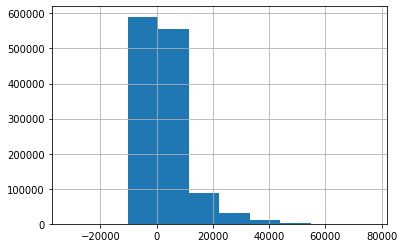

In [348]:
(df_complete['expected_return']-df_complete['total_pymnt']).hist()